In [ ]:
import pandas as pd
import numpy as np

# Fetch the Boston housing dataset from the original source (use with caution)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print(data.shape)

# Or, use an alternative dataset like California housing
from sklearn.datasets import fetch_california_housing
california_dataset= fetch_california_housing()
print(california_dataset.data.shape)

(506, 13)
(20640, 8)


In [ ]:
california_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
california = pd.DataFrame(california_dataset.data,columns=california_dataset.feature_names)
california['MEDV'] = california_dataset.target
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<ipython-input-5-8a77e44595c7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(california['MEDV'])


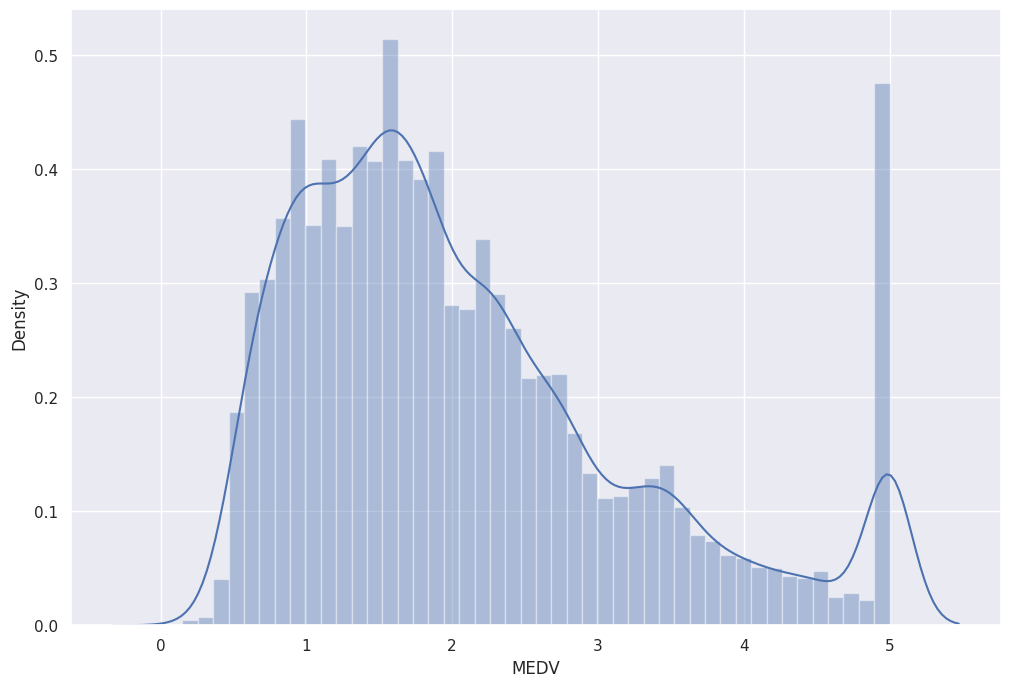

<Figure size 1200x800 with 0 Axes>

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(rc={'figure.figsize':(12,8)})
sb.distplot(california['MEDV'])
plt.show()

plt.savefig('distribution plot.png',dpi = 300)

<Axes: >

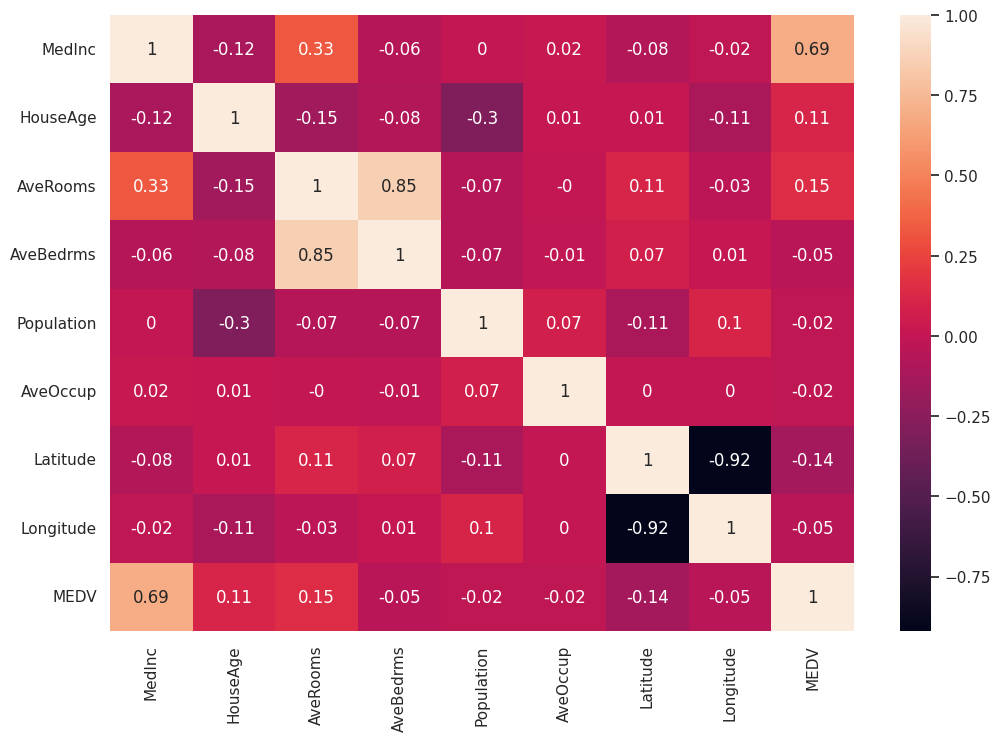

In [ ]:
correlation_matrix = california.corr().round(2)
sb.heatmap(data=correlation_matrix,annot=True)


In [ ]:
# Use the actual column names from the California Housing dataset
x = california[['MedInc', 'HouseAge']]  # Example features
y = california['MEDV']  # Target variable

NameError: name 'california' is not defined

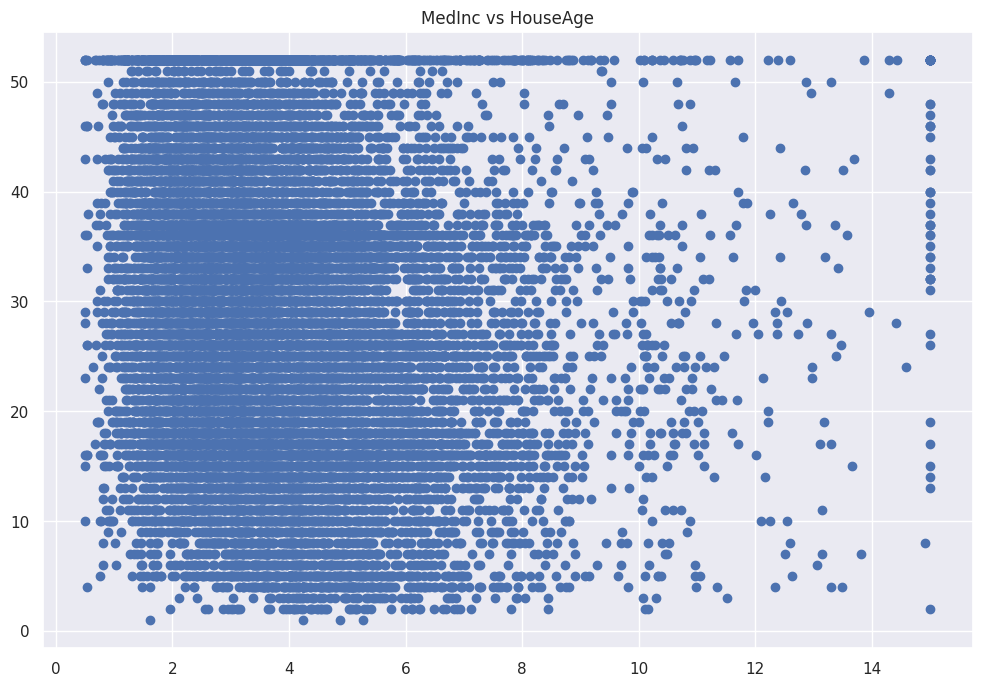

In [ ]:
plt.scatter(california['MedInc'],california['HouseAge'])
plt.title("MedInc vs HouseAge")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(r2)
print(rmse)

0.5202686758060495
0.7902871038231521


In [ ]:
from sklearn.preprocessing import PolynomialFeatures # Import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
x_poly_train = pf.fit_transform(x_train)

polynomial_lr = LinearRegression()
lr.fit(x_poly_train,y_train)

x_poly_test = pf.fit_transform(x_test)
y_pred = lr.predict(x_poly_test)

from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(r2)
print(rmse)

0.547631995167597
0.7674176738120905


# California Housing Price Prediction

This project explores the California Housing dataset and builds a linear regression model to predict median house values.

## Dataset

The dataset used in this project is the California Housing dataset, which contains information about median house values in California districts based on the 1990 U.S. census. The dataset includes the following attributes:

- **MedInc**: median income in block group
- **HouseAge**: median house age in block group
- **AveRooms**: average number of rooms per household
-   **AveBedrms**: average number of bedrooms per household
-   **Population**: block group population
-   **AveOccup**: average number of household members
-   **Latitude**: block group latitude
-   **Longitude**: block group longitude

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

## Project Structure

The project is organized as a Jupyter Notebook (or Google Colab notebook) with the following steps:

1.  **Data Loading and Exploration**: Load the California Housing dataset and perform initial data exploration, including checking the shape and exploring the dataset description.
2.  **Data Preparation**: Create a pandas DataFrame from the dataset and add the target variable. Display the first few rows of the DataFrame.
3.  **Data Visualization**: Generate visualizations to understand the distribution of the target variable and the relationships between features.
4.  **Feature Selection**: Select the features to be used for training the linear regression model.
5.  **Model Training**: Split the data into training and testing sets and train a linear regression model.
6.  **Model Evaluation**: Evaluate the performance of the linear regression model using metrics like Mean Squared Error (RMSE) and R-squared.
7.  **Polynomial Regression**: Explore a polynomial regression model to see if it improves performance.

## Dependencies

The project requires the following libraries:

-   pandas
-   numpy
-   seaborn
-   matplotlib
-   scikit-learn

You can install the dependencies using pip: